In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from umap.umap_ import UMAP
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings("ignore")

c:\Users\LENOVO\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("Ship_Performance_Dataset.csv")
df.head()

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,2023-06-04,Container Ship,NaN,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581


In [3]:
df['Ship_Type'].value_counts()

Ship_Type
Bulk Carrier      669
Fish Carrier      653
Tanker            643
Container Ship    635
Name: count, dtype: int64

# Exploratory Data Analysis (EDA)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     2736 non-null   object 
 1   Ship_Type                2600 non-null   object 
 2   Route_Type               2600 non-null   object 
 3   Engine_Type              2600 non-null   object 
 4   Maintenance_Status       2600 non-null   object 
 5   Speed_Over_Ground_knots  2736 non-null   float64
 6   Engine_Power_kW          2736 non-null   float64
 7   Distance_Traveled_nm     2736 non-null   float64
 8   Draft_meters             2736 non-null   float64
 9   Weather_Condition        2600 non-null   object 
 10  Cargo_Weight_tons        2736 non-null   float64
 11  Operational_Cost_USD     2736 non-null   float64
 12  Revenue_per_Voyage_USD   2736 non-null   float64
 13  Turnaround_Time_hours    2736 non-null   float64
 14  Efficiency_nm_per_kWh   

In [5]:
df.describe(exclude="object")

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
count,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000
mean,17.602863,1757.610939,1036.406203,9.929103,1032.573264,255143.344488,521362.062011,41.747536,0.798656,1.003816,4.914839,75.219222
std,4.311979,717.002777,568.632080,2.876423,558.697499,140890.482189,271211.625499,17.633130,0.403590,0.288251,2.597647,14.510168
min,10.009756,501.025220,50.433150,5.001947,50.229624,10092.306318,50351.814447,12.019909,0.100211,0.500004,1.000000,50.012005
25%,13.928452,1148.104914,548.511573,7.437485,553.983629,131293.378767,290346.388017,26.173537,0.463592,0.758033,3.000000,62.703724
50%,17.713757,1757.494344,1037.816060,9.918965,1043.207497,257157.653226,520176.931762,41.585188,0.789877,1.009009,5.000000,75.504709
75%,21.284785,2382.594292,1540.934161,12.413149,1527.722391,381796.930499,750072.791216,57.363922,1.147426,1.252808,7.000000,87.721205
max,24.997043,2998.734329,1998.337057,14.992947,1999.126697,499734.867868,999916.696140,71.972415,1.499259,1.499224,9.000000,99.999643


In [6]:
df.describe(include="object")

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Weather_Condition
count,2736,2600,2600,2600,2600,2600
unique,57,4,4,3,3,3
top,2023-06-04,Bulk Carrier,Long-haul,Diesel,Good,Calm
freq,48,669,686,892,873,893


In [7]:
df.select_dtypes(include='object').sample(5)

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Weather_Condition
1661,2023-07-30,Fish Carrier,Transoceanic,Heavy Fuel Oil (HFO),NaN,Calm
1616,2023-10-22,NaN,NaN,Heavy Fuel Oil (HFO),Fair,Rough
632,2023-07-09,Container Ship,Long-haul,Diesel,Fair,Moderate
661,2024-01-28,Fish Carrier,Transoceanic,Diesel,Good,Rough
840,2024-03-24,Tanker,Long-haul,Heavy Fuel Oil (HFO),Good,Calm


In [8]:
df.select_dtypes(exclude='object').sample(5)

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
512,15.300874,971.054972,1553.864593,11.222399,1515.050141,245663.592255,753012.462369,70.289306,0.697854,1.227991,6,82.601969
1066,21.715573,2254.452219,1839.123079,8.479199,1463.860375,140467.264755,662877.584777,40.725640,1.002643,0.813550,4,94.836401
1039,13.349143,667.934026,861.195485,10.784970,1384.745236,182789.272925,562759.719124,23.686521,0.775488,0.835259,5,74.083760
303,10.119366,1214.163350,1646.333308,12.301405,1771.737363,294479.668491,649419.534940,31.945943,1.069078,1.139938,7,70.011498
2699,16.987857,1118.740254,1996.527348,9.120271,1985.196743,440826.006550,277480.353540,61.526835,1.040988,0.711534,2,99.113422


In [9]:
print("Here the missing values in the categorical data type inside the dataset :")
print(df.select_dtypes(include='object').isnull().sum())
print("\n")
print("Here the missing values in the categorical data type inside the dataset :")
print(df.select_dtypes(exclude='object').isnull().sum())

Here the missing values in the categorical data type inside the dataset :
Date                    0
Ship_Type             136
Route_Type            136
Engine_Type           136
Maintenance_Status    136
Weather_Condition     136
dtype: int64


Here the missing values in the categorical data type inside the dataset :
Speed_Over_Ground_knots    0
Engine_Power_kW            0
Distance_Traveled_nm       0
Draft_meters               0
Cargo_Weight_tons          0
Operational_Cost_USD       0
Revenue_per_Voyage_USD     0
Turnaround_Time_hours      0
Efficiency_nm_per_kWh      0
Seasonal_Impact_Score      0
Weekly_Voyage_Count        0
Average_Load_Percentage    0
dtype: int64


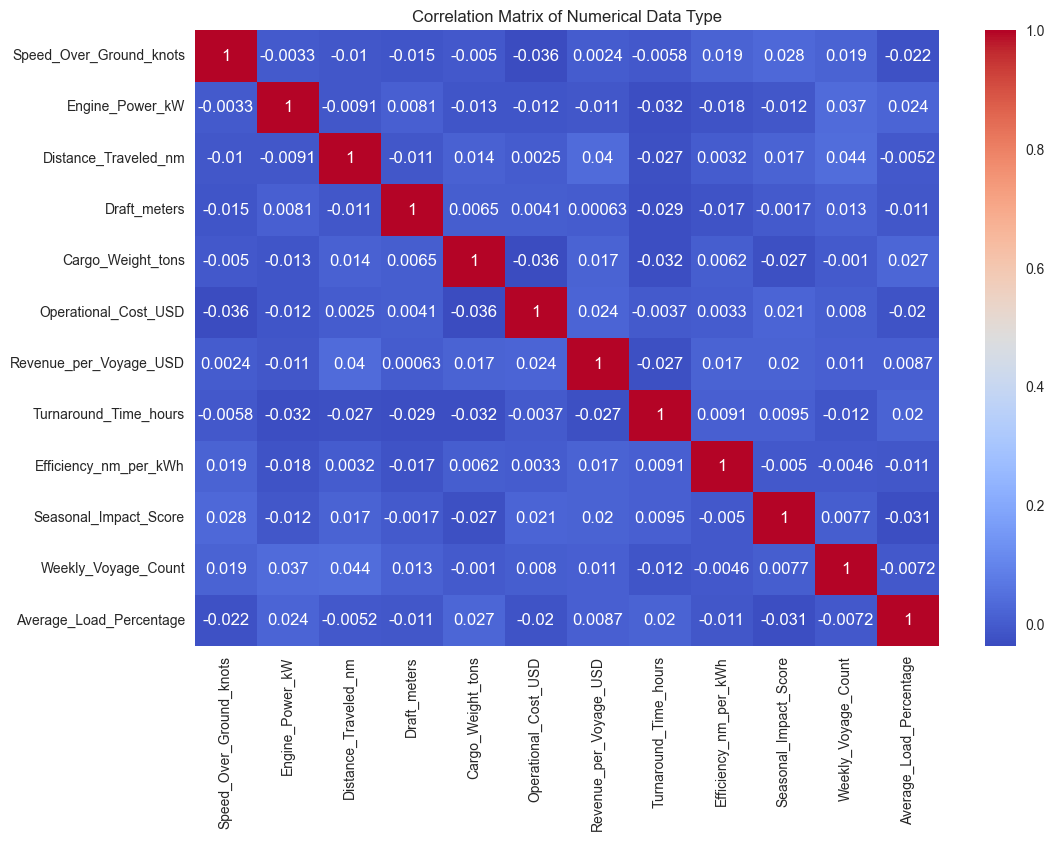

In [10]:
df.select_dtypes(exclude='object').corr()
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Data Type")
plt.show()

In [11]:
df.drop(columns=['Date'], inplace=True)
print("All column needed", df.columns.tolist())

All column needed ['Ship_Type', 'Route_Type', 'Engine_Type', 'Maintenance_Status', 'Speed_Over_Ground_knots', 'Engine_Power_kW', 'Distance_Traveled_nm', 'Draft_meters', 'Weather_Condition', 'Cargo_Weight_tons', 'Operational_Cost_USD', 'Revenue_per_Voyage_USD', 'Turnaround_Time_hours', 'Efficiency_nm_per_kWh', 'Seasonal_Impact_Score', 'Weekly_Voyage_Count', 'Average_Load_Percentage']


In [12]:
df.dropna(inplace=True)

In [13]:
numeric_df = df.select_dtypes(exclude='object').columns.tolist()
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[numeric_df])
df_scaled = pd.DataFrame(df_scaled, columns=numeric_df)

object_df = df.select_dtypes(include='object').columns.tolist()
df_encoded = pd.DataFrame()
for col in object_df:
    le = LabelEncoder()
    encoded_col = pd.DataFrame(le.fit_transform(df[col]), columns=[col])
    df_encoded = pd.concat([df_encoded, encoded_col], axis=1)

print("Here the sample of the dataset after label encoding ang scaling :")
new_df = pd.concat([df_scaled, df_encoded], axis=1)
new_df.sample(5)

Here the sample of the dataset after label encoding ang scaling :


,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Weather_Condition
617,0.534566,0.627609,0.669668,0.350129,0.776844,0.404886,0.568356,0.065474,0.400126,0.389767,0.00,0.406197,1,0,1,1,1
1160,0.628817,0.440453,0.554288,0.745237,0.408585,0.526615,0.518511,0.966205,0.329590,0.104200,0.50,0.753293,0,3,1,0,1
1348,0.558037,0.251733,0.721554,0.947368,0.218149,0.005284,0.667785,0.529197,0.473779,0.796717,0.75,0.754285,0,2,2,2,2
782,0.908901,0.345727,0.445710,0.251719,0.203795,0.320795,0.602157,0.822067,0.665462,0.687691,0.50,0.722260,3,3,1,1,0
1983,0.687063,0.056095,0.636722,0.938073,0.863558,0.732434,0.423197,0.976200,0.062131,0.683275,1.00,0.466908,3,1,2,1,2


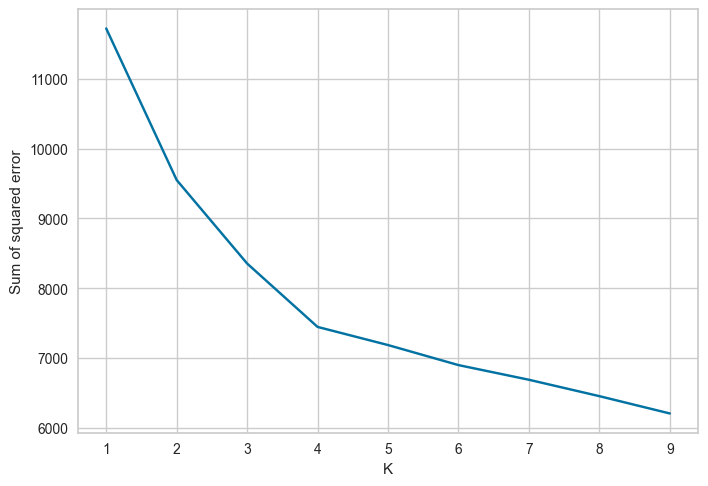

In [14]:
sse = []
k_rng= range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k, random_state=42)
    km. fit(new_df)
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt. plot(k_rng,sse)

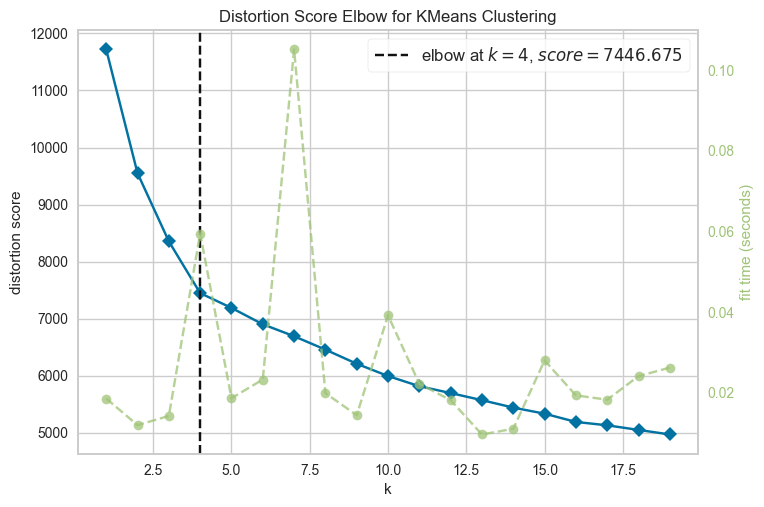

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k=(1, 20), locate_elbow=True)
visu.fit(new_df)
visu.show()

In [16]:
km = KMeans(n_clusters=6, random_state=42).fit(new_df)
labels = km.labels_
n_clusters = len(set(labels))
print(set(labels))
print(f"Number of clusters created: {n_clusters}")
print(f"Silhouette Score : {silhouette_score(new_df, labels)}")

{0, 1, 2, 3, 4, 5}
Number of clusters created: 6
Silhouette Score : 0.12186210034453905


In [17]:
# Use UMAP to reduce the dimensionality of the dataset
umap = UMAP(n_components=2, random_state=50)  # Reduce to 2 dimensions for better visualization
df_selected = umap.fit_transform(new_df)
df_selected = pd.DataFrame(df_selected, columns=umap.get_feature_names_out())

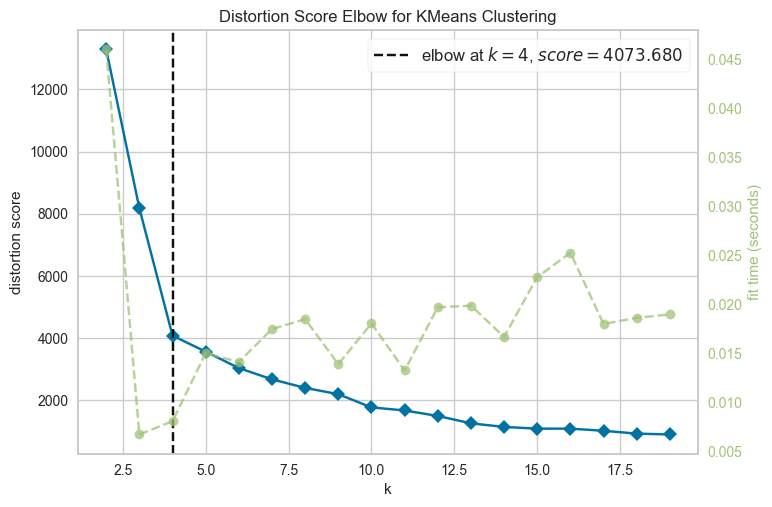

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
# Use elbow method again to determine the optimal number of clusters
kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k=(2, 20), locate_elbow=True)
visu.fit(df_selected)
visu.show()

In [19]:
# Fit to KMeans
km2 = KMeans(n_clusters=4, random_state=42).fit(df_selected)
labelss = km2.labels_
n_clusterss = len(set(labelss))
print(set(labelss))
print(f"Number of clusters created: {n_clusterss}")
print(f"Silhouette Score : {silhouette_score(df_selected, labelss)}")

{0, 1, 2, 3}
Number of clusters created: 4
Silhouette Score : 0.5329506397247314


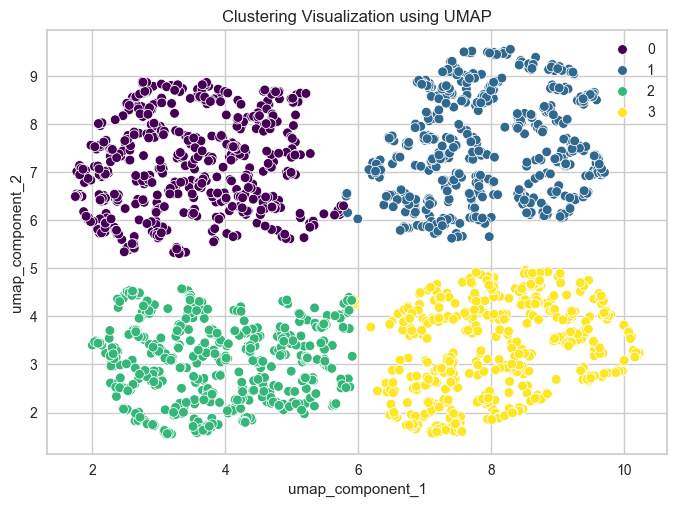

In [20]:
sns.scatterplot(x=df_selected['umap_component_1'], y=df_selected['umap_component_2'], hue=labelss, palette='viridis')
plt.title("Clustering Visualization using UMAP")
plt.show()

In [21]:
df_labelled = df.copy()

In [22]:
df_labelled['cluster'] = labelss
df_labelled.sample(5)

,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage,cluster
730,Bulk Carrier,Short-haul,Steam Turbine,Fair,20.915357,1005.142098,997.096572,6.347835,Rough,1212.989607,179889.153079,793734.708714,54.967753,0.138449,1.273975,7,51.696348,2
2596,Bulk Carrier,Transoceanic,Steam Turbine,Good,15.541223,1316.084392,122.027548,5.681968,Moderate,1498.303002,485012.097091,584406.213834,68.713332,0.609905,1.148866,3,80.267351,2
1945,Bulk Carrier,Short-haul,Steam Turbine,Fair,18.700453,702.945271,63.129592,14.068107,Moderate,1251.281788,376976.744717,645658.325393,64.337917,0.758549,0.636132,4,84.137550,2
988,Container Ship,Coastal,Heavy Fuel Oil (HFO),Critical,14.292715,2485.406167,563.752021,13.697713,Moderate,1159.756983,99488.400795,134593.958515,22.814629,0.298573,0.736844,9,61.932631,0
2606,Tanker,Short-haul,Heavy Fuel Oil (HFO),Fair,20.968473,2728.744386,737.054089,13.996878,Moderate,1457.430794,135404.910449,796923.886102,22.081585,0.476416,0.757407,2,75.478937,3


In [23]:
df_labelled.to_csv("Ship_Performance_Dataset_with_Clusters.csv", index=False)

In [24]:
grouped = df_labelled.select_dtypes(exclude='object').groupby('cluster').agg('mean')
grouped[['Engine_Power_kW', 'Distance_Traveled_nm', 'Cargo_Weight_tons', 'Operational_Cost_USD', 'Revenue_per_Voyage_USD']].round(2)

,Engine_Power_kW,Distance_Traveled_nm,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD
cluster,,,,,
0,1727.16,1034.62,993.14,257999.19,519943.92
1,1759.29,1066.94,1081.54,249241.85,526990.30
2,1737.96,1018.06,1043.62,259066.92,529963.77
3,1780.52,1034.89,1016.23,262223.62,516977.57


In [25]:
grouped[['Engine_Power_kW', 'Distance_Traveled_nm', 'Cargo_Weight_tons', 'Operational_Cost_USD', 'Revenue_per_Voyage_USD']].round(2).describe()

,Engine_Power_kW,Distance_Traveled_nm,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD
count,4.000000,4.000000,4.000000,4.000000,4.000000
mean,1751.232500,1038.627500,1033.632500,257132.895000,523468.890000
std,23.652523,20.450336,38.023538,5558.026986,6031.761585
min,1727.160000,1018.060000,993.140000,249241.850000,516977.570000
25%,1735.260000,1030.480000,1010.457500,255809.855000,519202.332500
50%,1748.625000,1034.755000,1029.925000,258533.055000,523467.110000
75%,1764.597500,1042.902500,1053.100000,259856.095000,527733.667500
max,1780.520000,1066.940000,1081.540000,262223.620000,529963.770000


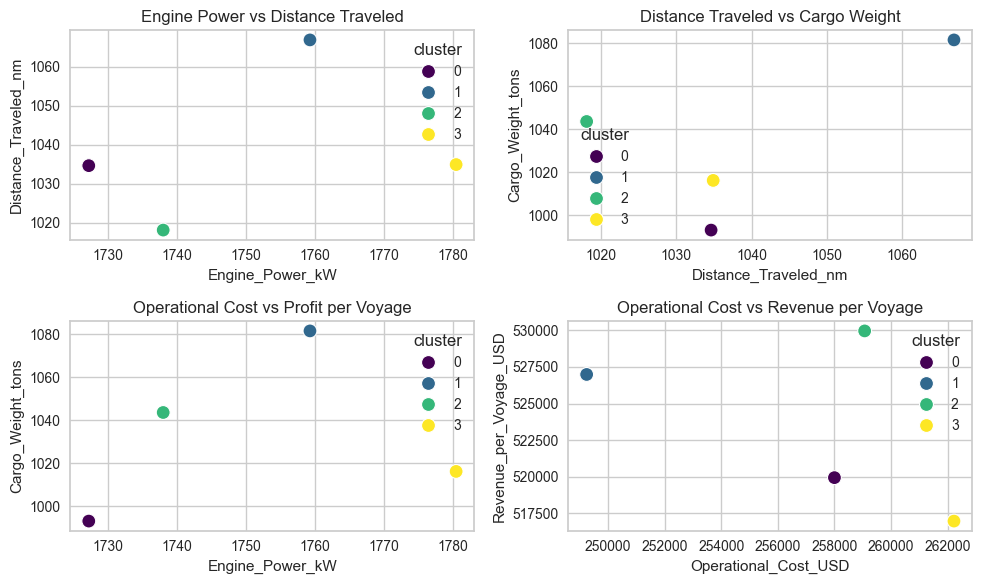

In [26]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
sns.scatterplot(x=grouped['Engine_Power_kW'], y=grouped['Distance_Traveled_nm'], hue=grouped.index, palette='viridis', s=100)
plt.title("Engine Power vs Distance Traveled")

plt.subplot(2, 2, 2)
sns.scatterplot(x=grouped['Distance_Traveled_nm'], y=grouped['Cargo_Weight_tons'], hue=grouped.index, palette='viridis', s=100)
plt.title("Distance Traveled vs Cargo Weight")

plt.subplot(2, 2, 3)
sns.scatterplot(x=grouped['Engine_Power_kW'], y=grouped['Cargo_Weight_tons'], hue=grouped.index, palette='viridis', s=100)
plt.title("Operational Cost vs Profit per Voyage")

plt.subplot(2, 2, 4)
sns.scatterplot(x=grouped['Operational_Cost_USD'], y=grouped['Revenue_per_Voyage_USD'], hue=grouped.index, palette='viridis', s=100)
plt.title("Operational Cost vs Revenue per Voyage")

plt.tight_layout()
plt.show()

# Cluster Analysis Characteristic from KMeans Model

## **Possibly different result for each KMeans runs!**

**First of all**, every cluster has their own profit!

Below are the simple characteristics for each cluster:

## Cluster 0:

- Very High Power
- Maximum Operating Cost
- Needs Machine Upgrade
- Requires Efficiency Improvement
- Lowest Revenue Generated

## Cluster 1:

- Most Profitable Ships
- Covers Longest Routes
- Has Advanced Technology
- Carries Heavy Cargo
- Lowest Operating Cost

## Cluster 2:

- Shows Balanced Performance
- Uses Average Power
- Has Good Revenue
- Takes Shortest Routes
- Needs Cost Reduction

## Cluster 3:

- Minimal Engine Power
- For Short Routes
- Carries Light Cargo
- Below Average Revenue
- High Operating Cost


In [27]:
# Separate the dataset into based on the numerical and categorical features
object_df = df.select_dtypes(include='object').columns.tolist()
numeric_df = df.select_dtypes(exclude='object').columns.tolist()[:-1]

In [28]:
# Encode the categorical features
df_encoded = df_labelled.copy()
for col in object_df:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    
df_encoded.head()

,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage,cluster
1,2,2,2,2,10.387580,1796.057415,1060.486382,14.653083,2,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372,3
2,1,1,0,1,20.749747,1648.556685,658.874144,7.199261,1,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244,0
3,0,3,2,1,21.055102,915.261795,1126.822519,11.789063,1,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698,2
4,2,3,0,1,13.742777,1089.721803,1445.281159,9.727833,1,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581,3
5,2,1,1,1,18.616196,2171.646567,723.304215,14.916320,2,1912.509751,184569.045384,776698.354849,47.476155,1.370206,1.437725,7,53.174898,1


In [29]:
df_encoded.corr().style.background_gradient(cmap='coolwarm')

,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage,cluster
Ship_Type,1.000000,-0.005061,-0.002412,0.021391,-0.001529,0.023173,0.031185,-0.009197,0.037600,0.027149,-0.009999,-0.010122,-0.055871,-0.029836,-0.009054,-0.012124,0.024345,0.390376
Route_Type,-0.005061,1.000000,0.021232,-0.025663,0.019161,0.007980,-0.028985,-0.011956,0.025154,-0.000006,0.026461,0.005026,0.014026,0.020634,-0.028771,0.050469,-0.021422,0.797869
Engine_Type,-0.002412,0.021232,1.000000,0.030899,-0.011519,-0.011730,-0.008641,0.016596,0.027403,-0.004889,0.005326,-0.008836,0.009535,0.032957,-0.016554,-0.018200,-0.027421,0.019923
Maintenance_Status,0.021391,-0.025663,0.030899,1.000000,0.005853,0.004180,0.010883,0.015652,0.041056,0.002481,0.025971,-0.018081,0.002236,-0.001970,0.003428,0.014667,-0.015983,-0.017297
Speed_Over_Ground_knots,-0.001529,0.019161,-0.011519,0.005853,1.000000,-0.003418,-0.020910,-0.001154,-0.010121,-0.005315,-0.037313,-0.007315,-0.005852,0.021941,0.028013,0.028241,-0.023010,0.033974
Engine_Power_kW,0.023173,0.007980,-0.011730,0.004180,-0.003418,1.000000,0.019513,0.010585,-0.015283,-0.023154,-0.013084,-0.004830,-0.042732,-0.013101,-0.020896,0.057647,0.030977,0.021829
Distance_Traveled_nm,0.031185,-0.028985,-0.008641,0.010883,-0.020910,0.019513,1.000000,-0.012352,0.020150,0.004833,0.018911,0.056033,-0.015876,-0.011757,0.013607,0.049771,-0.029574,-0.009222
Draft_meters,-0.009197,-0.011956,0.016596,0.015652,-0.001154,0.010585,-0.012352,1.000000,-0.001759,0.026118,-0.006377,0.022005,-0.022383,-0.025276,-0.013314,0.016618,-0.015922,-0.011733
Weather_Condition,0.037600,0.025154,0.027403,0.041056,-0.010121,-0.015283,0.020150,-0.001759,1.000000,-0.014136,-0.010186,0.020094,0.004196,-0.022514,0.023310,0.019528,-0.014233,0.055233
Cargo_Weight_tons,0.027149,-0.000006,-0.004889,0.002481,-0.005315,-0.023154,0.004833,0.026118,-0.014136,1.000000,-0.037521,0.008617,-0.029312,0.015545,-0.028628,-0.020576,0.015010,0.007348


In [30]:
# Separate the dataset into features and target
X = df_encoded.drop('cluster', axis=1)
y = df_encoded['cluster']

# Split the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [31]:
# Scaling the numerical features without involving the encoded categorical features
scaler = MinMaxScaler()
X_train_clean = X_train.copy()
X_test_clean = X_test.copy()

X_train_scaled_numeric = scaler.fit_transform(X_train[numeric_df])
X_test_scaled_numeric = scaler.transform(X_test[numeric_df])

X_train_scaled_numeric_df = pd.DataFrame(X_train_scaled_numeric, columns=numeric_df)
X_test_scaled_numeric_df = pd.DataFrame(X_test_scaled_numeric, columns=numeric_df)

for i in X_train_scaled_numeric_df.columns:
    X_train_clean[i] = X_train_scaled_numeric_df[i].values
    X_test_clean[i] = X_test_scaled_numeric_df[i].values


In [32]:
# Check all train data is clean
X_train_clean.isna().sum().sum(), X_test_clean.isna().sum().sum()

(0, 0)

In [33]:
# Simple check the distribution of the target in the training and testing set
y_train.value_counts(), y_test.value_counts()

(cluster
 0    445
 1    435
 3    413
 2    408
 Name: count, dtype: int64,
 cluster
 0    111
 1    109
 3    104
 2    102
 Name: count, dtype: int64)

In [34]:
knn = KNeighborsClassifier()
knn.fit(X_train_clean, y_train)

KNeighborsClassifier()

In [35]:
dt = DecisionTreeClassifier()
dt.fit(X_train_clean, y_train)

DecisionTreeClassifier()

In [36]:
# Code the visualization function
def check_metrics(model, X_train, y_train, X_test, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    print(f"{model.__class__.__name__} Accuracy Score:")
    print(f"Train : {accuracy_score(y_train, y_pred_train)*100:.2f}% | Test : {accuracy_score(y_test, y_pred_test)*100:.2f}%")
    print(f"{model.__class__.__name__} Macro Precision Score:")
    print(f"Train : {precision_score(y_train, y_pred_train, average='macro'):.2f} | Test : {precision_score(y_test, y_pred_test, average='macro'):.2f}")
    print(f"{model.__class__.__name__} Macro Recall Score:")
    print(f"Train : {recall_score(y_train, y_pred_train, average='macro'):.2f} | Test : {recall_score(y_test, y_pred_test, average='macro'):.2f}")
    print(f"{model.__class__.__name__} Macro F1 Score:")
    print(f"Train : {f1_score(y_train, y_pred_train, average='macro'):.2f} | Test : {f1_score(y_test, y_pred_test, average='macro'):.2f}")
    print(f"{model.__class__.__name__} Confusion Matrix:")
    plt.figure(figsize=(15, 7))
    plt.subplot(1, 2, 1)
    sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='d')
    plt.title('Train Data Confusion Matrix')
    plt.subplot(1, 2, 2)
    sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d')
    plt.title('Test Data Confusion Matrix')
    plt.tight_layout()
    plt.show()

KNeighborsClassifier Accuracy Score:
Train : 94.71% | Test : 90.61%
KNeighborsClassifier Macro Precision Score:
Train : 0.95 | Test : 0.91
KNeighborsClassifier Macro Recall Score:
Train : 0.95 | Test : 0.91
KNeighborsClassifier Macro F1 Score:
Train : 0.95 | Test : 0.91
KNeighborsClassifier Confusion Matrix:


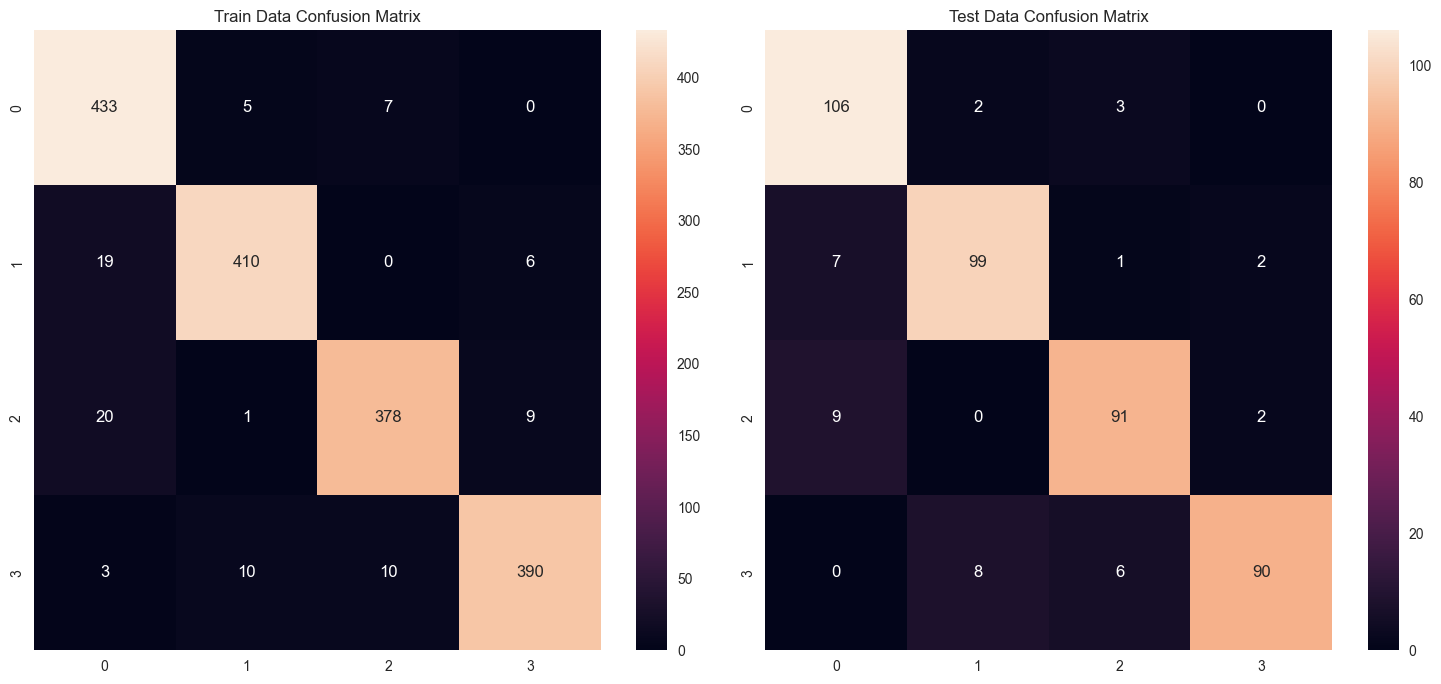

In [37]:
# KNN model evaluation
check_metrics(knn, X_train_clean, y_train, X_test_clean, y_test)

DecisionTreeClassifier Accuracy Score:
Train : 100.00% | Test : 98.83%
DecisionTreeClassifier Macro Precision Score:
Train : 1.00 | Test : 0.99
DecisionTreeClassifier Macro Recall Score:
Train : 1.00 | Test : 0.99
DecisionTreeClassifier Macro F1 Score:
Train : 1.00 | Test : 0.99
DecisionTreeClassifier Confusion Matrix:


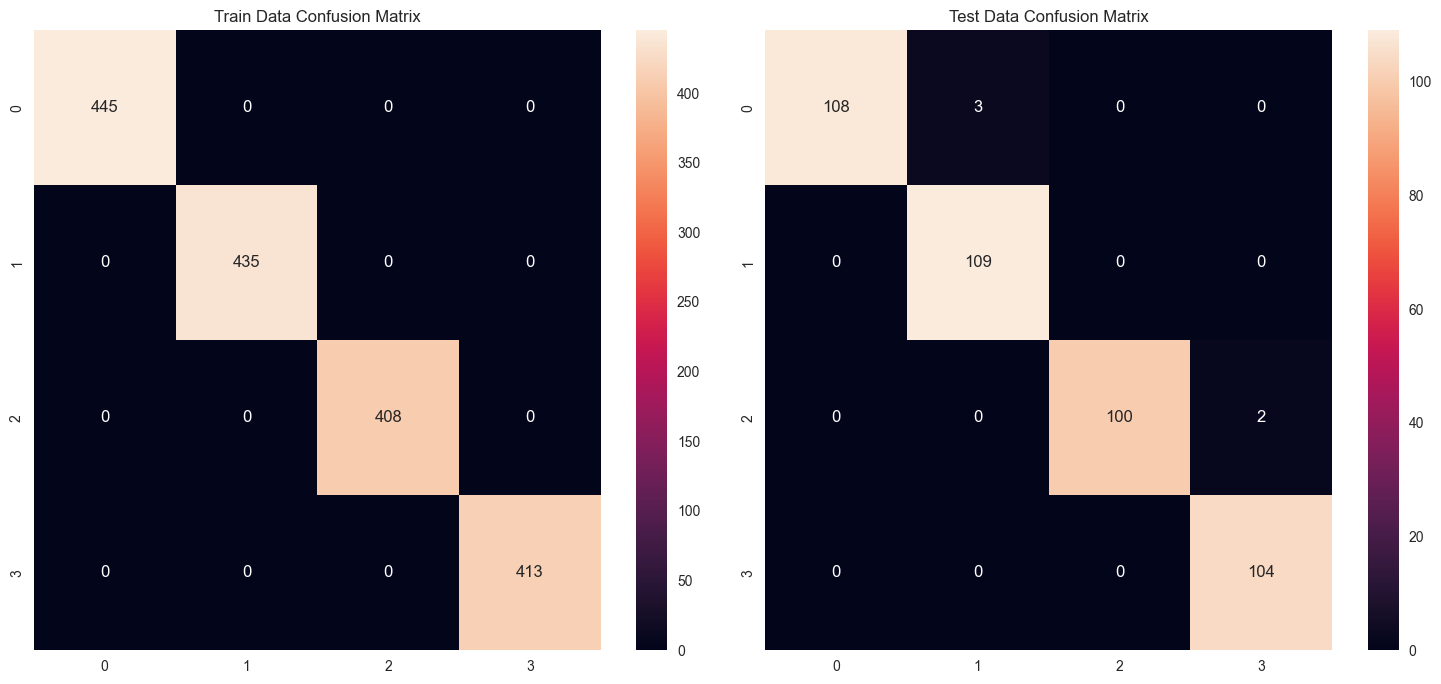

In [38]:
# Decision Tree model evaluation
check_metrics(dt, X_train_clean, y_train, X_test_clean, y_test)

In [39]:
# Example user input
user_input = pd.DataFrame({
    'Ship_Type': ['Bulk Carrier'],  # Original ship type
    'Route_Type': ['Transoceanic'],  # Original route type
    'Engine_Type': ['Diesel'],  # Original engine type
    'Maintenance_Status': ['Good'],  # Original maintenance status
    'Speed_Over_Ground_knots': [15.0],
    'Engine_Power_kW': [2500.0],
    'Distance_Traveled_nm': [10000.0],
    'Draft_meters': [10.0],
    'Weather_Condition': ['Rough'],  # Original weather condition
    'Cargo_Weight_tons': [500.0],
    'Operational_Cost_USD': [200000.0],
    'Revenue_per_Voyage_USD': [600000.0],
    'Turnaround_Time_hours': [48.0],
    'Efficiency_nm_per_kWh': [0.5],
    'Seasonal_Impact_Score': [1.0],
    'Weekly_Voyage_Count': [5],
    'Average_Load_Percentage': [80.0]
})

# Create a copy for encoding
user_input_encoded = user_input.copy()

# Encode categorical features using LabelEncoder
for col in object_df:
    le = LabelEncoder()
    # Fit on training data
    le.fit(df[col])
    # Transform user input
    user_input_encoded[col] = le.transform(user_input[col])

# Scale the numerical features
numeric_features = user_input_encoded[numeric_df].values
scaled_numeric = scaler.transform(numeric_features)

# Update the scaled numeric features
for i, col in enumerate(numeric_df):
    user_input_encoded[col] = scaled_numeric[0][i]

# Make predictions with encoded and scaled data
knn_pred = knn.predict(user_input_encoded)
dt_pred = dt.predict(user_input_encoded)

print("\nInput Data (Before Encoding):")
print(user_input)

print("\nInput Data (After Encoding and Scaling):")
print(user_input_encoded)

print("\nPrediction Results:\n")
print(f"KNN Model predicts Cluster: {knn_pred[0]}")
print(f"Decision Tree Model predicts Cluster: {dt_pred[0]}")

# Define cluster characteristics
cluster_profiles = {
    0: "High Power High Cost Fleet",
    1: "Premium Performance Fleet",
    2: "Balanced Performance Fleet",
    3: "Economy Fleet"
}

# Print interpretation
print("\nInterpretation:\n")
print(f"Based on KNN model, this ship's performance pattern matches: {cluster_profiles[knn_pred[0]]}")
print(f"Based on Decision Tree model, this ship's performance pattern matches: {cluster_profiles[dt_pred[0]]}")

# Print characteristics based on majority prediction
majority_cluster = knn_pred[0] if knn_pred[0] == dt_pred[0] else knn_pred[0]
print("\nCharacteristics of this performance pattern:")

if majority_cluster == 0:
    print("- Very high engine power consumption")
    print("- Maximum operational costs")
    print("- Needs efficiency improvements")
    print("- Lower revenue generation")
    print("- May need equipment upgrades")
elif majority_cluster == 1:
    print("- Highly profitable operations")
    print("- Covers extensive routes")
    print("- Advanced technology utilization")
    print("- Handles heavy cargo efficiently")
    print("- Optimal operational costs")
elif majority_cluster == 2:
    print("- Balanced performance metrics")
    print("- Average power consumption")
    print("- Good revenue generation")
    print("- Shorter route operations")
    print("- Potential for cost optimization")
else:  # cluster 3
    print("- Minimal engine power usage")
    print("- Operates on shorter routes")
    print("- Handles lighter cargo loads")
    print("- Below average revenue")
    print("- Higher operational costs relative to revenue")


Input Data (Before Encoding):
      Ship_Type    Route_Type Engine_Type Maintenance_Status  \
0  Bulk Carrier  Transoceanic      Diesel               Good   

   Speed_Over_Ground_knots  Engine_Power_kW  Distance_Traveled_nm  \
0                     15.0           2500.0               10000.0   

   Draft_meters Weather_Condition  Cargo_Weight_tons  Operational_Cost_USD  \
0          10.0             Rough              500.0              200000.0   

   Revenue_per_Voyage_USD  Turnaround_Time_hours  Efficiency_nm_per_kWh  \
0                600000.0                   48.0                    0.5   

   Seasonal_Impact_Score  Weekly_Voyage_Count  Average_Load_Percentage  
0                    1.0                    5                     80.0  

Input Data (After Encoding and Scaling):
   Ship_Type  Route_Type  Engine_Type  Maintenance_Status  \
0          0           3            0                   2   

   Speed_Over_Ground_knots  Engine_Power_kW  Distance_Traveled_nm  \
0            

In [40]:
import pickle

# Save the model to a file
with open('ship_performance_dt_model.pkl', 'wb') as f:
    pickle.dump(dt, f)